In [1]:
# First Machine Learning Model, Practicing

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.filterwarnings("ignore")
df = pd.read_csv('/kaggle/input/vehicle-sales-data/car_prices.csv')

In [3]:
print(df.dtypes)
df = df.query("make == 'Toyota' & model == 'Camry'").reset_index(drop = True)


year              int64
make             object
model            object
trim             object
body             object
transmission     object
vin              object
state            object
condition       float64
odometer        float64
color            object
interior         object
seller           object
mmr             float64
sellingprice    float64
saledate         object
dtype: object


In [4]:
df['saledate'] = pd.to_datetime(df['saledate'], utc= True)
df['sale_year'] = df['saledate'].dt.year
df['saledate'] = df['saledate'].dt.date
df ['age_of_car'] = 2015 - df['sale_year']
df ['mmr_delta'] = df['sellingprice'] - df['mmr']


df = df.dropna().reset_index(drop = True)

df.head(3)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,sale_year,age_of_car,mmr_delta
0,2013,Toyota,Camry,LE,Sedan,automatic,4t4bf1fk5dr275482,ca,38.0,38882.0,red,beige,avis corporation,13200.0,13500.0,2014-12-18,2014,1,300.0
1,2013,Toyota,Camry,XLE,Sedan,automatic,4t1bk1fk0du529833,ca,5.0,2575.0,black,gray,the car exchange,21800.0,22000.0,2014-12-17,2014,1,200.0
2,2013,Toyota,Camry,LE,Sedan,automatic,4t4bf1fk2dr316831,ca,44.0,13948.0,beige,beige,toyota financial services,14950.0,14900.0,2014-12-22,2014,1,-50.0


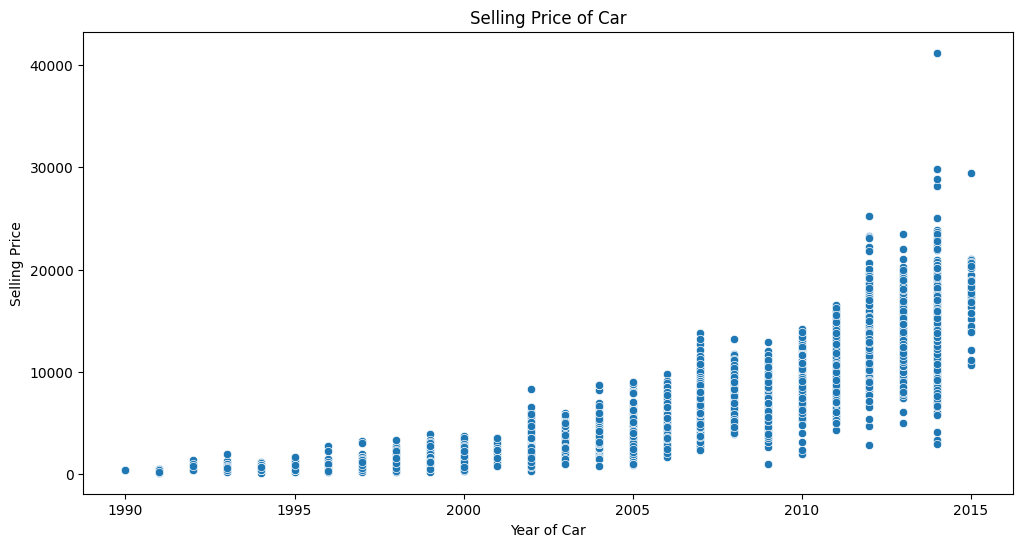

In [5]:
plt.figure(figsize = [12,6])
sns.scatterplot(x=df['year'], y=df['sellingprice'])
plt.xlabel('Year of Car')
plt.ylabel('Selling Price')
plt.title('Selling Price of Car')

plt.show()

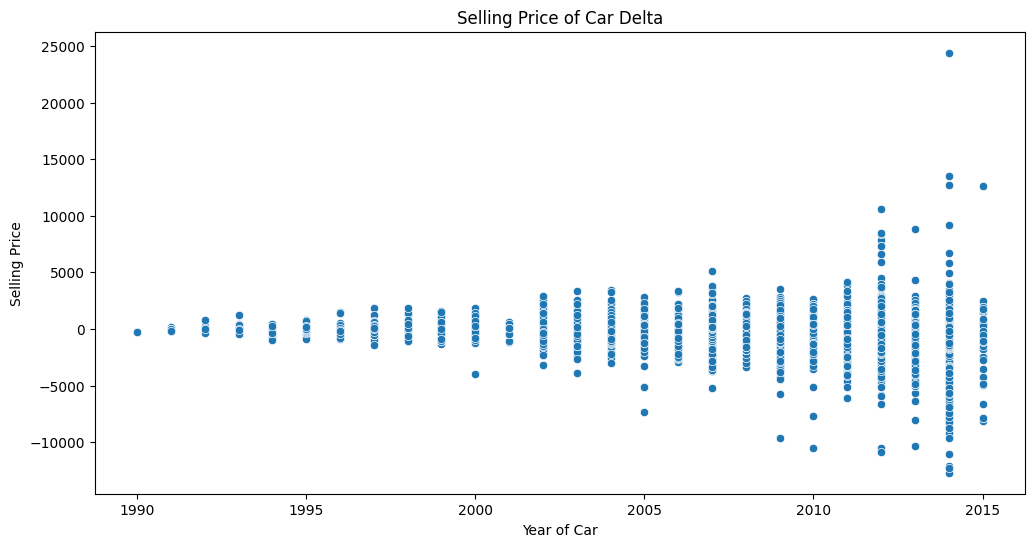

In [6]:
plt.figure(figsize = [12,6])
sns.scatterplot(x=df['year'], y=df['mmr_delta'])
plt.xlabel('Year of Car')
plt.ylabel('Selling Price')
plt.title('Selling Price of Car Delta')

plt.show()

# Modeling

In [7]:
#Model Feature
df = df.dropna()
display(df)


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,sale_year,age_of_car,mmr_delta
0,2013,Toyota,Camry,LE,Sedan,automatic,4t4bf1fk5dr275482,ca,38.0,38882.0,red,beige,avis corporation,13200.0,13500.0,2014-12-18,2014,1,300.0
1,2013,Toyota,Camry,XLE,Sedan,automatic,4t1bk1fk0du529833,ca,5.0,2575.0,black,gray,the car exchange,21800.0,22000.0,2014-12-17,2014,1,200.0
2,2013,Toyota,Camry,LE,Sedan,automatic,4t4bf1fk2dr316831,ca,44.0,13948.0,beige,beige,toyota financial services,14950.0,14900.0,2014-12-22,2014,1,-50.0
3,2013,Toyota,Camry,SE,Sedan,automatic,4t1bf1fk5du259552,ca,38.0,30392.0,black,black,jpmorgan chase bank n.a.,15200.0,15700.0,2014-12-18,2014,1,500.0
4,2013,Toyota,Camry,L,Sedan,automatic,4t1bf1fk4du283826,ca,2.0,31300.0,silver,black,enterprise vehicle exchange / tra / rental / t...,13350.0,11200.0,2014-12-16,2014,1,-2150.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10981,2007,Toyota,Camry,LE,sedan,automatic,4t1be46k57u143616,fl,32.0,51066.0,silver,gray,ferco motors corp,7850.0,8000.0,2015-06-18,2015,0,150.0
10982,2002,Toyota,Camry,SE V6,sedan,automatic,4t1bf32k82u534345,ca,19.0,190668.0,green,gray,lithia hyundai of fresno,1975.0,1600.0,2015-06-17,2015,0,-375.0
10983,2011,Toyota,Camry,LE,sedan,automatic,4t1bf3ek5bu767899,pa,4.0,51351.0,blue,gray,hawthorne auto sales co,10350.0,10700.0,2015-06-18,2015,0,350.0
10984,2009,Toyota,Camry,LE,sedan,automatic,4t1be46k09u850089,pa,29.0,127667.0,green,beige,adcock brothers inc,6450.0,5600.0,2015-06-18,2015,0,-850.0


In [8]:
#Encoding
from sklearn.preprocessing import LabelEncoder


# Assuming df is your DataFrame
df1 = df.drop(columns = ['saledate','vin', 'seller'])
# Perform one-hot encoding for categorical columns
encoded_df = pd.get_dummies(df1)

# Display the resulting DataFrame
#display(df_encoded)
df_encoded = encoded_df

In [9]:
X = df_encoded.drop(columns = ['sellingprice'])


In [10]:
#Value we are trying to predicit
y = df1['sellingprice'].values



In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [12]:

from sklearn.tree import DecisionTreeClassifier
import numpy as np

# Assuming you have defined and populated X_train, y_train, X_test, and y_test
# Create the classifier
decision_tree_classifier = DecisionTreeClassifier()

# Train the classifier on the training set
decision_tree_classifier.fit(X_train, y_train)

# Validate the classifier on the testing set using classification accuracy
accuracy = decision_tree_classifier.score(X_test, y_test)
print("Classification accuracy:", accuracy)


Classification accuracy: 0.41572624681470693


In [13]:
#Encoding
from sklearn.preprocessing import LabelEncoder


# Assuming df is your DataFrame
model_test = df.drop(columns = ['saledate','vin', 'seller','sellingprice'])
# Perform one-hot encoding for categorical columns
model_encoded_df = pd.get_dummies(model_test)
model_test_y = df['sellingprice'].values

# Display the resulting DataFrame
#display(df_encoded)
model_df_encoded = model_encoded_df

In [14]:
model_test = model_test.reset_index(drop=True)
predicted_price = decision_tree_classifier.predict(model_df_encoded)
predicted_price = pd.DataFrame(predicted_price, columns = ['predicted_price'])
# The 'predicted_labels' now contains the predicted labels for the new data instances

# You can then use these predicted labels for further analysis or evaluation

df_model = pd.concat([model_test, predicted_price],axis = 1)


sellingprice = pd.DataFrame(model_test_y, columns = ['sellingprice'])

df_model = pd.concat([df_model, sellingprice], axis = 1) 


df_model['model_delta'] = df_model['predicted_price'] - df_model['sellingprice']
keep = ['year','condition','odometer','mmr','sale_year','age_of_car','mmr_delta','year','condition','odometer','mmr','sale_year','age_of_car','mmr_delta','sellingprice', 'predicted_price','model_delta']
df_model = df_model[keep]
df_model

,year,condition,odometer,mmr,sale_year,age_of_car,mmr_delta,year,condition,odometer,mmr,sale_year,age_of_car,mmr_delta,sellingprice,predicted_price,model_delta
0,2013,38.0,38882.0,13200.0,2014,1,300.0,2013,38.0,38882.0,13200.0,2014,1,300.0,13500.0,13500.0,0.0
1,2013,5.0,2575.0,21800.0,2014,1,200.0,2013,5.0,2575.0,21800.0,2014,1,200.0,22000.0,22000.0,0.0
2,2013,44.0,13948.0,14950.0,2014,1,-50.0,2013,44.0,13948.0,14950.0,2014,1,-50.0,14900.0,14900.0,0.0
3,2013,38.0,30392.0,15200.0,2014,1,500.0,2013,38.0,30392.0,15200.0,2014,1,500.0,15700.0,15700.0,0.0
4,2013,2.0,31300.0,13350.0,2014,1,-2150.0,2013,2.0,31300.0,13350.0,2014,1,-2150.0,11200.0,11900.0,700.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10981,2007,32.0,51066.0,7850.0,2015,0,150.0,2007,32.0,51066.0,7850.0,2015,0,150.0,8000.0,8000.0,0.0
10982,2002,19.0,190668.0,1975.0,2015,0,-375.0,2002,19.0,190668.0,1975.0,2015,0,-375.0,1600.0,1600.0,0.0
10983,2011,4.0,51351.0,10350.0,2015,0,350.0,2011,4.0,51351.0,10350.0,2015,0,350.0,10700.0,10700.0,0.0
10984,2009,29.0,127667.0,6450.0,2015,0,-850.0,2009,29.0,127667.0,6450.0,2015,0,-850.0,5600.0,5900.0,300.0


In [15]:
Outliers = df_model.query("model_delta > 3000 or model_delta <-3000")
Outliers_rows = len(df_model.query("model_delta > 3000 or model_delta <-3000"))
df_model_rows = len(df_model)

print("Outliers Row Count:", Outliers_rows)
print("df_model Row Count:", df_model_rows)
accuracy = abs(((Outliers_rows - df_model_rows) / df_model_rows) * 100)
print("Accuracy Within +/- $3000:",round(accuracy, 2),"%")


Outliers Row Count: 12
df_model Row Count: 10986
Accuracy Within +/- $3000: 99.89 %


In [16]:
incorrect_rows = df_model.query("model_delta != 0")
incorrect_row_count = len(df_model.query("model_delta != 0"))
df_model_rows = len(df_model)

print("Incorrect Row Count:", incorrect_row_count)
print("df_model Row Count:", df_model_rows)

accuracy = abs(((Outliers_rows - df_model_rows) / df_model_rows) * 100)
print("Accuracy:",round(accuracy, 2),"%")


Incorrect Row Count: 1605
df_model Row Count: 10986
Accuracy: 99.89 %


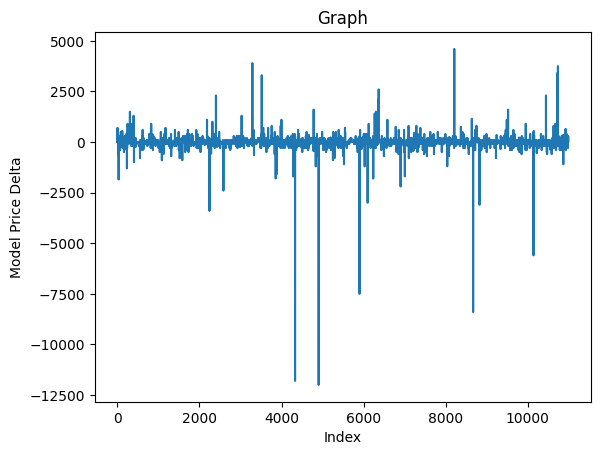

,year,condition,odometer,mmr,sale_year,age_of_car,mmr_delta,year,condition,odometer,mmr,sale_year,age_of_car,mmr_delta,sellingprice,predicted_price,model_delta
2245,2007,38.0,57461.0,8725.0,2015,0,5075.0,2007,38.0,57461.0,8725.0,2015,0,5075.0,13800.0,10400.0,-3400.0
3290,2012,44.0,42238.0,12700.0,2015,0,-5900.0,2012,44.0,42238.0,12700.0,2015,0,-5900.0,6800.0,10700.0,3900.0
3518,2014,1.0,999999.0,15400.0,2015,0,-12100.0,2014,1.0,999999.0,15400.0,2015,0,-12100.0,3300.0,6600.0,3300.0
4330,2014,48.0,12899.0,16800.0,2015,0,24400.0,2014,48.0,12899.0,16800.0,2015,0,24400.0,41200.0,29400.0,-11800.0
4905,2014,46.0,17767.0,15400.0,2015,0,13500.0,2014,46.0,17767.0,15400.0,2015,0,13500.0,28900.0,16900.0,-12000.0
5900,2012,28.0,47618.0,12600.0,2015,0,-3100.0,2012,28.0,47618.0,12600.0,2015,0,-3100.0,9500.0,2000.0,-7500.0
8209,2012,1.0,47944.0,13450.0,2015,0,-10550.0,2012,1.0,47944.0,13450.0,2015,0,-10550.0,2900.0,7500.0,4600.0
8668,2012,19.0,32777.0,12650.0,2015,0,-2250.0,2012,19.0,32777.0,12650.0,2015,0,-2250.0,10400.0,2000.0,-8400.0
8824,2013,19.0,52008.0,11700.0,2015,0,4300.0,2013,19.0,52008.0,11700.0,2015,0,4300.0,16000.0,12900.0,-3100.0
10138,2012,19.0,26915.0,15750.0,2015,0,7350.0,2012,19.0,26915.0,15750.0,2015,0,7350.0,23100.0,17500.0,-5600.0


In [17]:
df_model['model_delta'].plot()
plt.xlabel('Index')
plt.ylabel('Model Price Delta')
plt.title('Graph')
plt.show()
display(Outliers)